## 1. Import libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data

In [15]:
df = pd.read_excel("Online_Retail.xlsx")

## 3. Basic cleaning

In [20]:
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## 4. Create snapshot date

In [22]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

## 5. Create RFM table

In [24]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

## 6. Create segments

In [28]:
rfm['Segment'] = 'Occasional'

rfm.loc[(rfm['Frequency'] > 10) & (rfm['Monetary'] > 1000), 'Segment'] = 'VIP'
rfm.loc[(rfm['Frequency'] > 10) & (rfm['Monetary'] <= 1000), 'Segment'] = 'Loyal'
rfm.loc[rfm['Recency'] > 180, 'Segment'] = 'At Risk'

In [35]:
rfm

,Recency,Frequency,Monetary,Segment
CustomerID,,,,
12346.0,326,1,77183.60,At Risk
12347.0,2,7,4310.00,Occasional
12348.0,75,4,1797.24,Occasional
12349.0,19,1,1757.55,Occasional
12350.0,310,1,334.40,At Risk
...,...,...,...,...
18280.0,278,1,180.60,At Risk
18281.0,181,1,80.82,At Risk
18282.0,8,2,178.05,Occasional


## 7. Segment analysis

In [33]:
segment_summary = rfm.groupby('Segment').agg({
    'Monetary': 'sum',
    'Frequency': 'mean',
    'Recency': 'mean'
}).reset_index()

print(segment_summary)

      Segment     Monetary  Frequency     Recency
0     At Risk   556091.251   1.504651  269.118605
1  Occasional  3972100.163   3.235762   52.549157
2         VIP  4383216.490  21.098507   14.385075


## 8. Visualization

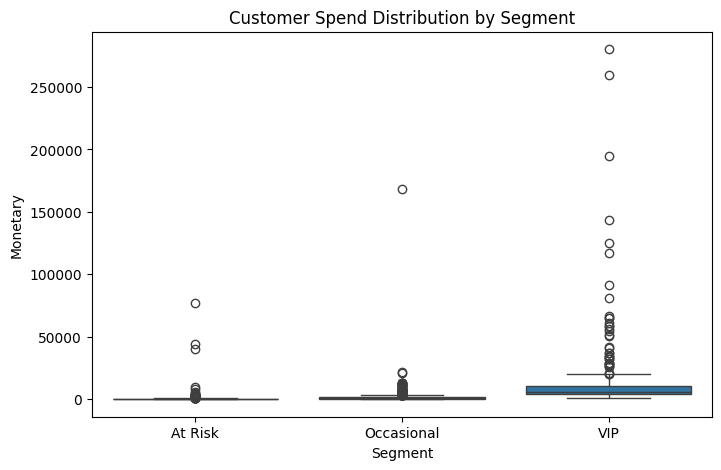

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='Monetary', data=rfm.reset_index())
plt.title("Customer Spend Distribution by Segment")
plt.show()